In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


# Ideal

 Biến đổi Fourier rời rạc - Discrete Fourier Transform (DFT)

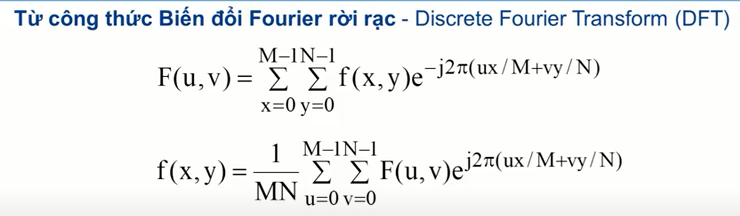

In [ ]:
# Định nghĩa hàm biến đổi DFT
def DFT1D(img):
    U = len(img)
    outarry = np.zeros(U, dtype=complex)
    for m in range(U):
        sum = 0.0
        for n in range(U):
            e = np.exp(-1j * 2 * np.pi * m * n / U)
            sum += img[n] * e
        outarry[m] = sum
    return outarry

def IDFT1D(img):
    U = len(img)
    outarry = np.zeros(U,dtype=complex)
    for n in range(U):
        sum = 0.0
        for m in range(U):
            e = np.exp(1j * 2 * np.pi * m * n / U)
            sum += img[m]*e
        pixel = sum/U
        outarry[n]=pixel
    return outarry

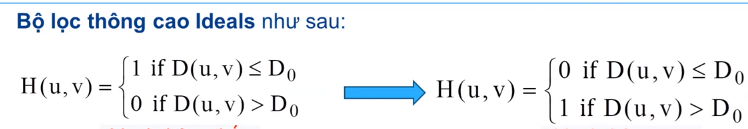

Ideal thông cao

In [ ]:
# Định nghĩa hàm lọc thông cao Ideals
def HighPass_Ideals(D0,U,V):
    # H is our filter
    H = np.zeros((U, V))
    D = np.zeros((U, V))
    U0 = int(U / 2)
    V0 = int(V / 2)
    # Tính khoảng cách
    for u in range(U):
        for v in range(V):
            u2 = np.power(u, 2)
            v2 = np.power(v, 2)
            D[u, v] = np.sqrt(u2 + v2)
    # Tính bộ lọc
    for u in range(U):
        for v in range(V):
            if D[np.abs(u - U0), np.abs(v - V0)] <= D0:
                H[u, v] = 0
            else:
                H[u, v] = 1
    return H

def Show_HighPass_Ideals():
    # Đọc ảnh
    image = cv2.imread("test.tif", 0)
    image = cv2.resize(src=image, dsize=(100, 100))
    # Chuyển các pixel của ảnh vào mảng 2 chiều f
    f = np.asarray(image)
    M, N = np.shape(f)  # Chiều x và y của ảnh

    # Bước 1: Chuyển ảnh từ kích thước MxN vào ảnh PxQ với P= 2M và Q =2N
    P, Q = 2*M , 2*N
    shape = np.shape(f)
    # Chuyển ảnh PxQ vào mảng fp
    f_xy_p = np.zeros((P, Q))
    f_xy_p[:shape[0], :shape[1]] = f

    # Bước 2: Nhân ảnh fp(x,y) với (-1) mũ (x+y) để tạo ảnh mới
    # Kết quả nhân lưu vào ma trận ảnh fpc
    F_xy_p = np.zeros((P, Q))
    for x in range(P):
        for y in range(Q):
            F_xy_p[x, y] = f_xy_p[x, y] * np.power(-1, x + y)

    # Bước 3: Chuyển đổi ảnh Fpc sang miền tần số (DFT)
    dft_cot = dft_hang = np.zeros((P, Q))
    # DFT theo chiều P - theo cột
    for i in range(P):
        dft_cot[i] = DFT1D(F_xy_p[i])
    # DFT theo chiều Q - theo hàng
    for j in range(Q):
        dft_hang[:, j] = DFT1D(dft_cot[:, j])

    # Bước 4: Gọi hàm HighPass_Ideals tạo bộ lọc thông cao Ideal
    H_uv = HighPass_Ideals(10,P,Q)

    # Bước 5: Nhân ảnh sau khi DFT với ảnh sau khi lọc
    #G_uv = np.multiply(dft2d, H_uv)
    G_uv = np.multiply(dft_hang, H_uv)

    # Bước 6:
    # Bước 6.1 Thực hiện biến đổi ngược DFT
    idft_cot = idft_hang = np.zeros((P, Q))
    # chuyển đổi DFT ngược theo chiều P - theo cột
    for i in range(P):
        idft_cot[i] = IDFT1D(G_uv[i])
    # Chuyển đổi DFT ngược theo chiều Q - theo hàng
    for j in range(Q):
        idft_hang[:, j] = IDFT1D(idft_cot[:, j])

    # Bước 6.2: Nhân phần thực ảnh sau khi biến đổi ngược với -1 mũ (x+y)
    g_array = np.asarray(idft_hang.real)
    P, Q = np.shape(g_array)
    g_xy_p = np.zeros((P, Q))
    for x in range(P):
        for y in range(Q):
            g_xy_p[x, y] = g_array[x, y] * np.power(-1, x + y)

    # Bước 7: Rút trích ảnh kích thước MxN từ ảnh PxQ
    # Và đây ảnh cuối cùng sau khi lọc
    g_xy = g_xy_p[:shape[0], :shape[1]]

    # Hiển thị ảnh
    fig = plt.figure(figsize=(16, 9))  # Tạo vùng vẽ tỷ lệ 16:9
    #Tạo 9 vùng vẽ con
    (ax1, ax2, ax3), (ax4, ax5, ax6),(ax7, ax8, ax9) = fig.subplots(3, 3)

    # Đọc và hiển thị ảnh gốc
    ax1.imshow(image, cmap='gray')
    ax1.set_title('Ảnh gốc MxN')
    ax1.axis('off')
    # Hiển thị ảnh mở rộng có kích thước PxQ
    ax2.imshow(f_xy_p, cmap='gray')
    ax2.set_title('Bước 1: Ảnh PxQ')
    ax2.axis('off')
    # Hiển thị ảnh sau khi nhân -1 mũ (x+y)
    ax3.imshow(F_xy_p, cmap='gray')
    ax3.set_title('Bước 2: nhân -1 mũ x+y')
    ax3.axis('off')
    # Hiển thị phổ tần số cảu anh sau khi biến đổi Fourier
    ax4.imshow(dft_hang, cmap='gray')
    ax4.set_title('Bước 3: Phổ tần số ảnh sau khi DFT')
    ax4.axis('off')
    # Hiển thị phổ tần số của bộ lọc
    ax5.imshow(H_uv, cmap='gray')
    ax5.set_title('Bước 4: Phổ tần số Bộ lọc')
    ax5.axis('off')
    # Hiển thị phổ tần số của kết quả sau khi nhân Phổ tần số sau khi DFT
    # với bộ lọc
    ax6.imshow(G_uv, cmap='gray')
    ax6.set_title('Bước 5: Sau khi nhân DFT với ảnh sau khi lọc ')
    ax6.axis('off')
    # Hiển thị ảnh sau khi biến đổi ngược
    ax7.imshow(idft_hang, cmap='gray')
    ax7.set_title('Bước 6.1: Thực hiện DFT ngược')
    ax7.axis('off')
    # Hiển thị phần thực của ảnh sau khi nhân -1 mũ (x+y)
    ax8.imshow(g_xy_p, cmap='gray')
    ax8.set_title('Bước 6.2: Phần thực sau IDFT nhân -1 mũ (x+y)')
    ax8.axis('off')
    # Hiển thị ảnh cuối cùng sau các bước, là ảnh cải thiện kích thước MxN
    ax9.imshow(g_xy, cmap='gray')
    ax9.set_title('Bước 7: Ảnh cuối cùng MxN')
    ax9.axis('off')

    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: ComplexWarning: Casting complex values to real discards the imaginary part


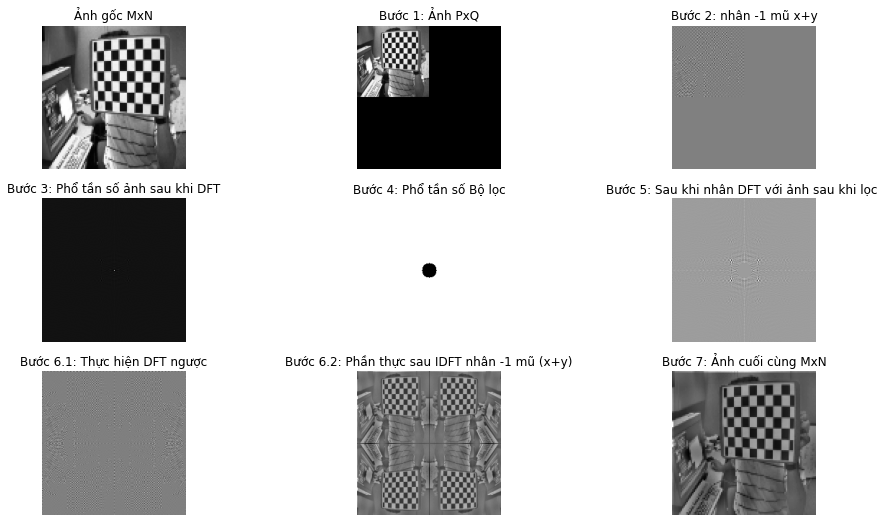

In [ ]:
Show_HighPass_Ideals()

Ideal thông thấp

In [ ]:
# Định nghĩa hàm lọc thông thấp Ideals
def lowPass_Ideals(D0,U,V):
    # H is our filter
    H = np.zeros((U, V))
    D = np.zeros((U, V))
    U0 = int(U / 2)
    V0 = int(V / 2)
    # Tính khoảng cách
    for u in range(U):
        for v in range(V):
            u2 = np.power(u, 2)
            v2 = np.power(v, 2)
            D[u, v] = np.sqrt( u2 +v2)
    # Tính bộ lọc
    for u in range(U):
        for v in range(V):
            if D[np.abs(u - U0), np.abs(v - V0)] <= D0:
                H[u, v] = 1
            else:
                H[u, v] = 0
    return H

def show_lowPass_Ideals():
    # Đọc ảnh
    image = cv2.imread("test.tif", 0)
    image = cv2.resize(src=image, dsize=(100, 100))
    # Chuyển các pixel của ảnh vào mảng 2 chiều f
    f = np.asarray(image)
    M, N = np.shape(f)  # Chiều x và y của ảnh

    # Bước 1: Chuyển ảnh từ kích thước MxN vào ảnh PxQ với P= 2M và Q =2N
    P, Q = 2*M , 2*N
    shape = np.shape(f)
    # Chuyển ảnh PxQ vào mảng fp
    f_xy_p = np.zeros((P, Q))
    f_xy_p[:shape[0], :shape[1]] = f

    # Bước 2: Nhân ảnh fp(x,y) với (-1) mũ (x+y) để tạo ảnh mới
    # Kết quả nhân lưu vào ma trận ảnh fpc
    F_xy_p = np.zeros((P, Q))
    for x in range(P):
        for y in range(Q):
            F_xy_p[x, y] = f_xy_p[x, y] * np.power(-1, x + y)

    # Bước 3: Chuyển đổi ảnh Fpc sang miền tần số (DFT)
    # dft2d = DFT2D(F_xy_p)
    dft_cot = dft_hang = np.zeros((P, Q))
    # DFT chiều P - theo cột
    for i in range(P):
        dft_cot[i] = DFT1D(F_xy_p[i])
    # DFT chiều Q - theo hàng
    for j in range(Q):
        dft_hang[:, j] = DFT1D(dft_cot[:, j])

    # Bước 4: Gọi hàm lowPass_Ideals tạo bộ lọc thông thấp Ideals
    H_uv = lowPass_Ideals(60,P,Q)

    # Bước 5: Nhân ảnh sau khi DFT với ảnh sau khi lọc
    G_uv = np.multiply(dft_hang, H_uv)

    # Bước 6:
    # Bước 6.1 Thực hiện biến đổi ngược DFT
    idft_cot = idft_hang = np.zeros((P, Q))
    # chuyển đổi DFT ngược theo chiều P - theo cột
    for i in range(P):
        idft_cot[i] = IDFT1D(G_uv[i])
    # Chuyển đổi DFT ngược theo chiều Q - theo hàng
    for j in range(Q):
        idft_hang[:, j] = IDFT1D(idft_cot[:, j])

    # Bước 6.2: Nhân phần thực ảnh sau khi biến đổi ngược với -1 mũ (x+y)
    g_array = np.asarray(idft_hang.real)
    P, Q = np.shape(g_array)
    g_xy_p = np.zeros((P, Q))
    for x in range(P):
        for y in range(Q):
            g_xy_p[x, y] = g_array[x, y] * np.power(-1, x + y)

    # Bước 7: Rút trích ảnh kích thước MxN từ ảnh PxQ
    # Và đây ảnh cuối cùng sau khi lọc
    g_xy = g_xy_p[:shape[0], :shape[1]]

    # Hiển thị ảnh
    fig = plt.figure(figsize=(16, 9))  # Tạo vùng vẽ tỷ lệ 16:9
    #Tạo 9 vùng vẽ con
    (ax1, ax2, ax3), (ax4, ax5, ax6),(ax7, ax8, ax9) = fig.subplots(3, 3)

    # Đọc và hiển thị ảnh gốc
    ax1.imshow(image, cmap='gray')
    ax1.set_title('Ảnh gốc MxN')
    ax1.axis('off')
    # Hiển thị ảnh mở rộng có kích thước PxQ
    ax2.imshow(f_xy_p, cmap='gray')
    ax2.set_title('Bước 1: Ảnh PxQ')
    ax2.axis('off')
    # Hiển thị ảnh sau khi nhân -1 mũ (x+y)
    ax3.imshow(F_xy_p, cmap='gray')
    ax3.set_title('Bước 2: nhân -1 mũ x+y')
    ax3.axis('off')
    # Hiển thị phổ tần số cảu anh sau khi biến đổi Fourier
    ax4.imshow(dft_hang, cmap='gray')
    ax4.set_title('Bước 3: Phổ tần số ảnh sau khi DFT')
    ax4.axis('off')
    # Hiển thị phổ tần số của bộ lọc
    ax5.imshow(H_uv, cmap='gray')
    ax5.set_title('Bước 4: Phổ tần số Bộ lọc')
    ax5.axis('off')
    # Hiển thị phổ tần số của kết quả sau khi nhân Phổ tần số sau khi DFT
    # với bộ lọc
    ax6.imshow(G_uv, cmap='gray')
    ax6.set_title('Bước 5: Sau khi nhân DFT với ảnh sau khi lọc ')
    ax6.axis('off')
    # Hiển thị ảnh sau khi biến đổi ngược
    ax7.imshow(idft_hang, cmap='gray')
    ax7.set_title('Bước 6.1: Thực hiện DFT ngược')
    ax7.axis('off')
    # Hiển thị phần thực của ảnh sau khi nhân -1 mũ (x+y)
    ax8.imshow(g_xy_p, cmap='gray')
    ax8.set_title('Bước 6.2: Phần thực sau IDFT nhân -1 mũ (x+y)')
    ax8.axis('off')
    # Hiển thị ảnh cuối cùng sau các bước, là ảnh cải thiện kích thước MxN
    ax9.imshow(g_xy, cmap='gray')
    ax9.set_title('Bước 7: Ảnh cuối cùng MxN')
    ax9.axis('off')

    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: ComplexWarning: Casting complex values to real discards the imaginary part


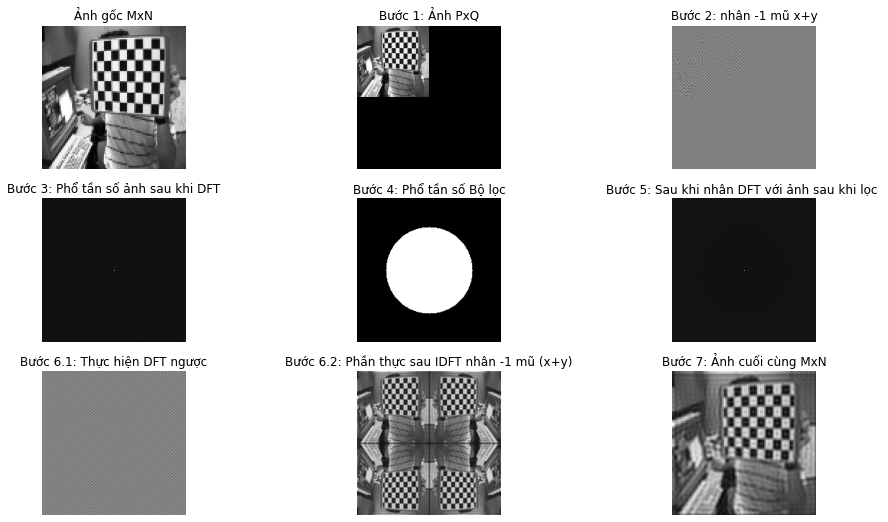

In [ ]:
show_lowPass_Ideals()

# **Butterworth**

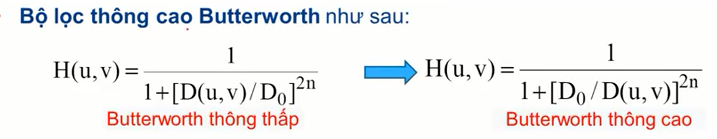

**Butterworth thông cao**

In [ ]:
# Định nghĩa hàm lọc thông cao butterworthHP
def butterworthHP(D0,U,V,n):
    H = np.zeros((U, V))
    D = np.zeros((U, V))
    U0 = int(U / 2)
    V0 = int(V / 2)
    # Tính khoảng cách
    for u in range(U):
        for v in range(V):
            u2 = np.power(u, 2)
            v2 = np.power(v, 2)
            D[u, v] = np.sqrt(u2 + v2)
    # Tính bộ lọc
    for u in range(U):
        for v in range(V):
            H[u, v] = 1 - 1 /((1 + D[np.abs(u-U0), np.abs(v-V0)]/D0)**(2*n))

    return H

def show_butterworthHP():
    # Đọc ảnh
    image = cv2.imread("test.tif", 0)
    image = cv2.resize(src=image, dsize=(100, 100))
    # Chuyển các pixel của ảnh vào mảng 2 chiều f
    f = np.asarray(image)
    M, N = np.shape(f)  # Chiều x và y của ảnh

    # Bước 1: Chuyển ảnh từ kích thước MxN vào ảnh PxQ với P= 2M và Q =2N
    P, Q = 2*M , 2*N
    shape = np.shape(f)
    # Chuyển ảnh PxQ vào mảng fp
    f_xy_p = np.zeros((P, Q))
    f_xy_p[:shape[0], :shape[1]] = f

    # Bước 2: Nhân ảnh fp(x,y) với (-1) mũ (x+y) để tạo ảnh mới
    # Kết quả nhân lưu vào ma trận ảnh fpc
    F_xy_p = np.zeros((P, Q))
    for x in range(P):
        for y in range(Q):
            F_xy_p[x, y] = f_xy_p[x, y] * np.power(-1, x + y)

    # Bước 3: Chuyển đổi ảnh Fpc sang miền tần số (DFT)
    dft_cot = dft_hang = np.zeros((P, Q))
    # DFT theo P - cột
    for i in range(P):
        dft_cot[i] = DFT1D(F_xy_p[i])
    # DFT theo Q - hàng
    for j in range(Q):
        dft_hang[:, j] = DFT1D(dft_cot[:, j])

    # Bước 4: Gọi hàm butterworthHP tạo bộ lọc thông cao butterworth
    H_uv = butterworthHP(60,P,Q,2)

    # Bước 5: Nhân ảnh sau khi DFT với ảnh sau khi lọc
    G_uv = np.multiply(dft_hang, H_uv)

    # Bước 6:
    # Bước 6.1 Thực hiện biến đổi ngược DFT
    idft_cot = idft_hang = np.zeros((P, Q))
    # chuyển đổi DFT ngược theo P - cột
    for i in range(P):
        idft_cot[i] = IDFT1D(G_uv[i])
    # Chuyển đổi DFT ngược theo Q - hàng
    for j in range(Q):
        idft_hang[:, j] = IDFT1D(idft_cot[:, j])

    # Bước 6.2: Nhân phần thực ảnh sau khi biến đổi ngược với -1 mũ (x+y)
    g_array = np.asarray(idft_hang.real)
    P, Q = np.shape(g_array)
    g_xy_p = np.zeros((P, Q))
    for x in range(P):
        for y in range(Q):
            g_xy_p[x, y] = g_array[x, y] * np.power(-1, x + y)

    # Bước 7: Rút trích ảnh kích thước MxN từ ảnh PxQ
    # Và đây ảnh cuối cùng sau khi lọc
    g_xy = g_xy_p[:shape[0], :shape[1]]

    # Hiển thị ảnh
    fig = plt.figure(figsize=(16, 9))  # Tạo vùng vẽ tỷ lệ 16:9
    #Tạo 9 vùng vẽ con
    (ax1, ax2, ax3), (ax4, ax5, ax6),(ax7, ax8, ax9) = fig.subplots(3, 3)

    # Đọc và hiển thị ảnh gốc
    ax1.imshow(image, cmap='gray')
    ax1.set_title('Ảnh gốc MxN')
    ax1.axis('off')
    # Hiển thị ảnh mở rộng có kích thước PxQ
    ax2.imshow(f_xy_p, cmap='gray')
    ax2.set_title('Bước 1: Ảnh PxQ')
    ax2.axis('off')
    # Hiển thị ảnh sau khi nhân -1 mũ (x+y)
    ax3.imshow(F_xy_p, cmap='gray')
    ax3.set_title('Bước 2: nhân -1 mũ x+y')
    ax3.axis('off')
    # Hiển thị phổ tần số cảu anh sau khi biến đổi Fourier
    ax4.imshow(dft_hang, cmap='gray')
    ax4.set_title('Bước 3: Phổ tần số ảnh sau khi DFT')
    ax4.axis('off')
    # Hiển thị phổ tần số của bộ lọc
    ax5.imshow(H_uv, cmap='gray')
    ax5.set_title('Bước 4: Phổ tần số Bộ lọc')
    ax5.axis('off')
    # Hiển thị phổ tần số của kết quả sau khi nhân Phổ tần số sau khi DFT
    # với bộ lọc
    ax6.imshow(G_uv, cmap='gray')
    ax6.set_title('Bước 5: Sau khi nhân DFT với ảnh sau khi lọc ')
    ax6.axis('off')
    # Hiển thị ảnh sau khi biến đổi ngược
    ax7.imshow(idft_hang, cmap='gray')
    ax7.set_title('Bước 6.1: Thực hiện DFT ngược')
    ax7.axis('off')
    # Hiển thị phần thực của ảnh sau khi nhân -1 mũ (x+y)
    ax8.imshow(g_xy_p, cmap='gray')
    ax8.set_title('Bước 6.2: Phần thực sau IDFT nhân -1 mũ (x+y)')
    ax8.axis('off')
    # Hiển thị ảnh cuối cùng sau các bước, là ảnh cải thiện kích thước MxN
    ax9.imshow(g_xy, cmap='gray')
    ax9.set_title('Bước 7: Ảnh cuối cùng MxN')
    ax9.axis('off')

    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: ComplexWarning: Casting complex values to real discards the imaginary part


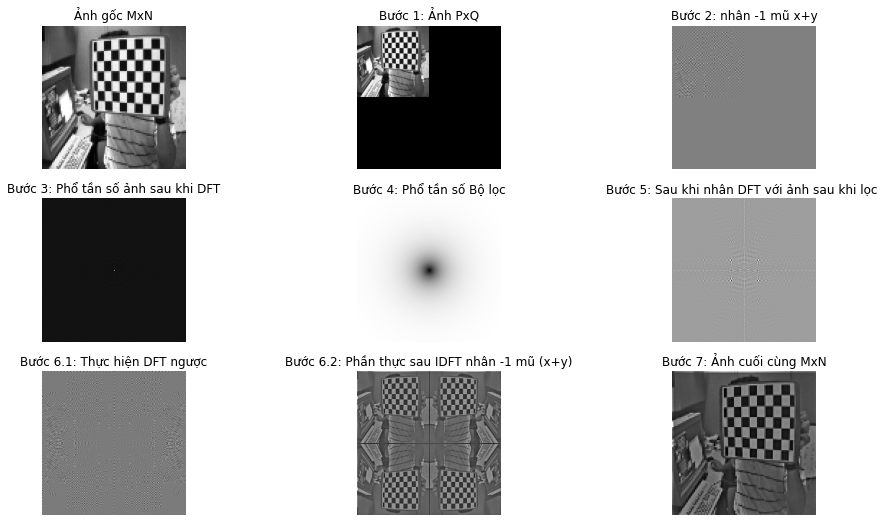

In [ ]:
show_butterworthHP()

**Butterworth thông thấp**

In [ ]:
# Định nghĩa hàm lọc thông thấp butterworthLP
def butterworthLP(D0,U,V,n):
    H = np.zeros((U, V))
    D = np.zeros((U, V))
    U0 = int(U / 2)
    V0 = int(V / 2)
    # Tính khoảng cách
    for u in range(U):
        for v in range(V):
            u2 = np.power(u, 2)
            v2 = np.power(v, 2)
            D[u, v] = np.sqrt(u2 + v2)
    #Tính bộ lọc
    for u in range(U):
        for v in range(V):
            H[u, v] = 1/((1+ D[np.abs(u - U0), np.abs(v - V0)]/D0)**(2*n))

    return H

def show_butterworthLP():
    # Đọc ảnh
    image = cv2.imread("test.tif", 0)
    image = cv2.resize(src=image, dsize=(100, 100))
    # Chuyển các pixel của ảnh vào mảng 2 chiều f
    f = np.asarray(image)
    M, N = np.shape(f)  # Chiều x và y của ảnh

    # Bước 1: Chuyển ảnh từ kích thước MxN vào ảnh PxQ với P= 2M và Q =2N
    P, Q = 2*M , 2*N
    shape = np.shape(f)
    # Chuyển ảnh PxQ vào mảng fp
    f_xy_p = np.zeros((P, Q))
    f_xy_p[:shape[0], :shape[1]] = f

    # Bước 2: Nhân ảnh fp(x,y) với (-1) mũ (x+y) để tạo ảnh mới
    # Kết quả nhân lưu vào ma trận ảnh fpc
    F_xy_p = np.zeros((P, Q))
    for x in range(P):
        for y in range(Q):
            F_xy_p[x, y] = f_xy_p[x, y] * np.power(-1, x + y)

    # Bước 3: Chuyển đổi ảnh Fpc sang miền tần số (DFT)
    dft_cot = dft_hang = np.zeros((P, Q))
    # DFT theo P - cột
    for i in range(P):
        dft_cot[i] = DFT1D(F_xy_p[i])
    # DFT theo Q - hàng
    for j in range(Q):
        dft_hang[:, j] = DFT1D(dft_cot[:, j])

    # Bước 4: Gọi hàm butterworthLP tạo bộ lọc thông thấp butterworth
    H_uv = butterworthLP(30,P,Q,2)

    # Bước 5: Nhân ảnh sau khi DFT với ảnh sau khi lọc
    #G_uv = np.multiply(dft2d, H_uv)
    G_uv = np.multiply(dft_hang, H_uv)

    # Bước 6:
    # Bước 6.1 Thực hiện biến đổi ngược DFT
    idft_cot = idft_hang = np.zeros((P, Q))
    # chuyển đổi DFT ngược theo P - cột
    for i in range(P):
        idft_cot[i] = IDFT1D(G_uv[i])
    # Chuyển đổi DFT ngược theo Q - hàng
    for j in range(Q):
        idft_hang[:, j] = IDFT1D(idft_cot[:, j])

    # Bước 6.2: Nhân phần thực ảnh sau khi biến đổi ngược với -1 mũ (x+y)
    g_array = np.asarray(idft_hang.real)
    P, Q = np.shape(g_array)
    g_xy_p = np.zeros((P, Q))
    for x in range(P):
        for y in range(Q):
            g_xy_p[x, y] = g_array[x, y] * np.power(-1, x + y)

    # Bước 7: Rút trích ảnh kích thước MxN từ ảnh PxQ
    # Và đây ảnh cuối cùng sau khi lọc
    g_xy = g_xy_p[:shape[0], :shape[1]]

    # Hiển thị ảnh
    fig = plt.figure(figsize=(16, 9))  # Tạo vùng vẽ tỷ lệ 16:9
    #Tạo 9 vùng vẽ con
    (ax1, ax2, ax3), (ax4, ax5, ax6),(ax7, ax8, ax9) = fig.subplots(3, 3)

    # Đọc và hiển thị ảnh gốc
    ax1.imshow(image, cmap='gray')
    ax1.set_title('Ảnh gốc MxN')
    ax1.axis('off')
    # Hiển thị ảnh mở rộng có kích thước PxQ
    ax2.imshow(f_xy_p, cmap='gray')
    ax2.set_title('Bước 1: Ảnh PxQ')
    ax2.axis('off')
    # Hiển thị ảnh sau khi nhân -1 mũ (x+y)
    ax3.imshow(F_xy_p, cmap='gray')
    ax3.set_title('Bước 2: nhân -1 mũ x+y')
    ax3.axis('off')
    # Hiển thị phổ tần số cảu anh sau khi biến đổi Fourier
    ax4.imshow(dft_hang, cmap='gray')
    ax4.set_title('Bước 3: Phổ tần số ảnh sau khi DFT')
    ax4.axis('off')
    # Hiển thị phổ tần số của bộ lọc
    ax5.imshow(H_uv, cmap='gray')
    ax5.set_title('Bước 4: Phổ tần số Bộ lọc')
    ax5.axis('off')
    # Hiển thị phổ tần số của kết quả sau khi nhân Phổ tần số sau khi DFT
    # với bộ lọc
    ax6.imshow(G_uv, cmap='gray')
    ax6.set_title('Bước 5: Sau khi nhân DFT với ảnh sau khi lọc ')
    ax6.axis('off')
    # Hiển thị ảnh sau khi biến đổi ngược
    ax7.imshow(idft_hang, cmap='gray')
    ax7.set_title('Bước 6.1: Thực hiện DFT ngược')
    ax7.axis('off')
    # Hiển thị phần thực của ảnh sau khi nhân -1 mũ (x+y)
    ax8.imshow(g_xy_p, cmap='gray')
    ax8.set_title('Bước 6.2: Phần thực sau IDFT nhân -1 mũ (x+y)')
    ax8.axis('off')
    # Hiển thị ảnh cuối cùng sau các bước, là ảnh cải thiện kích thước MxN
    ax9.imshow(g_xy, cmap='gray')
    ax9.set_title('Bước 7: Ảnh cuối cùng MxN')
    ax9.axis('off')

    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: ComplexWarning: Casting complex values to real discards the imaginary part


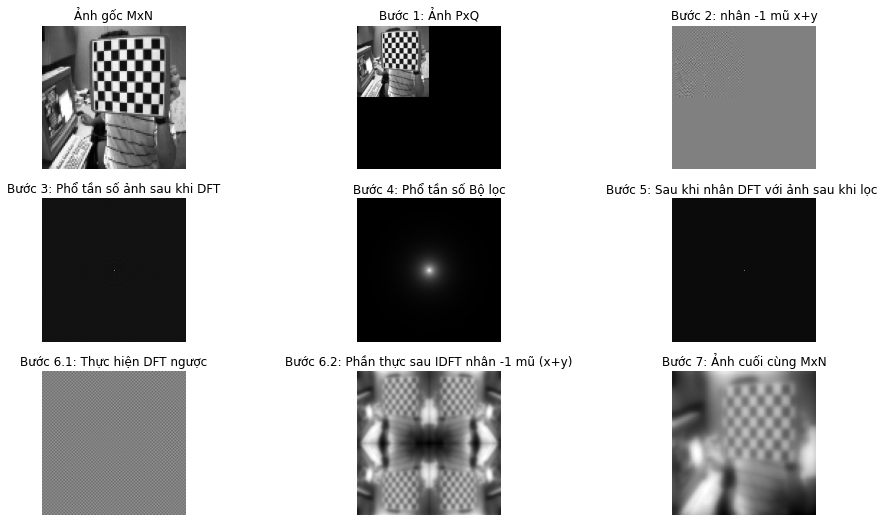

In [ ]:
show_butterworthLP()

# **Gaussian**

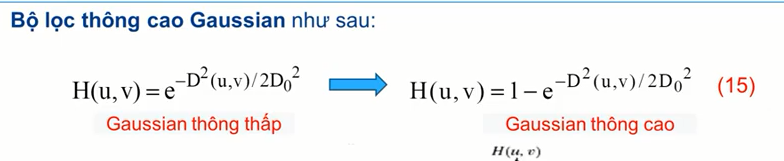

**Gaussian thông cao**

In [ ]:
# Định nghĩa hàm lọc thông cao GaussianHP
def GaussianHP(D0,U,V):
    # H cho filter
    H = np.zeros((U, V))
    D = np.zeros((U, V))
    U0 = int(U / 2)
    V0 = int(V / 2)
    # Tính khoảng cách
    for u in range(U):
        for v in range(V):
            u2 = np.power(u, 2)
            v2 = np.power(v, 2)
            D[u, v] = np.sqrt(u2 + v2)
    # Tính bộ lọc
    for u in range(U):
        for v in range(V):
            H[u, v] = 1- np.exp((-D[np.abs(u - U0), np.abs(v - V0)] ** 2) / (2 * (D0 ** 2)))

    return H

def show_GaussianHP():
    # Đọc ảnh
    image = cv2.imread("test.tif", 0)
    image = cv2.resize(src=image, dsize=(100, 100))
    # Chuyển các pixel của ảnh vào mảng 2 chiều f
    f = np.asarray(image)
    M, N = np.shape(f)  # Chiều x và y của ảnh

    # Bước 1: Chuyển ảnh từ kích thước MxN vào ảnh PxQ với P= 2M và Q =2N
    P, Q = 2*M , 2*N
    shape = np.shape(f)
    # Chuyển ảnh PxQ vào mảng fp
    f_xy_p = np.zeros((P, Q))
    f_xy_p[:shape[0], :shape[1]] = f

    # Bước 2: Nhân ảnh fp(x,y) với (-1) mũ (x+y) để tạo ảnh mới
    # Kết quả nhân lưu vào ma trận ảnh fpc
    F_xy_p = np.zeros((P, Q))
    for x in range(P):
        for y in range(Q):
            F_xy_p[x, y] = f_xy_p[x, y] * np.power(-1, x + y)

    # Bước 3: Chuyển đổi ảnh Fpc sang miền tần số (DFT)
    dft_cot = dft_hang = np.zeros((P, Q))
    # DFT theo P - cột
    for i in range(P):
        dft_cot[i] = DFT1D(F_xy_p[i])
    # DFT theo Q - hàng
    for j in range(Q):
        dft_hang[:, j] = DFT1D(dft_cot[:, j])

    # Bước 4: Gọi hàm GaussianHP tạo bộ lọc thông cao Gaussian
    H_uv = GaussianHP(10,P,Q)

    # Bước 5: Nhân ảnh sau khi DFT với ảnh sau khi lọc
    G_uv = np.multiply(dft_hang, H_uv)

    # Bước 6:
    # Bước 6.1 Thực hiện biến đổi ngược DFT
    idft_cot = idft_hang = np.zeros((P, Q))
    # chuyển đổi DFT ngược theo P - cột
    for i in range(P):
        idft_cot[i] = IDFT1D(G_uv[i])
    # Chuyển đổi DFT ngược theo Q - hàng
    for j in range(Q):
        idft_hang[:, j] = IDFT1D(idft_cot[:, j])

    # Bước 6.2: Nhân phần thực ảnh sau khi biến đổi ngược với -1 mũ (x+y)
    g_array = np.asarray(idft_hang.real)
    P, Q = np.shape(g_array)
    g_xy_p = np.zeros((P, Q))
    for x in range(P):
        for y in range(Q):
            g_xy_p[x, y] = g_array[x, y] * np.power(-1, x + y)

    # Bước 7: Rút trích ảnh kích thước MxN từ ảnh PxQ
    # Và đây ảnh cuối cùng sau khi lọc
    g_xy = g_xy_p[:shape[0], :shape[1]]

    # Hiển thị ảnh
    fig = plt.figure(figsize=(16, 9))  # Tạo vùng vẽ tỷ lệ 16:9
    #Tạo 9 vùng vẽ con
    (ax1, ax2, ax3), (ax4, ax5, ax6),(ax7, ax8, ax9) = fig.subplots(3, 3)

    # Đọc và hiển thị ảnh gốc
    ax1.imshow(image, cmap='gray')
    ax1.set_title('Ảnh gốc MxN')
    ax1.axis('off')
    # Hiển thị ảnh mở rộng có kích thước PxQ
    ax2.imshow(f_xy_p, cmap='gray')
    ax2.set_title('Bước 1: Ảnh PxQ')
    ax2.axis('off')
    # Hiển thị ảnh sau khi nhân -1 mũ (x+y)
    ax3.imshow(F_xy_p, cmap='gray')
    ax3.set_title('Bước 2: nhân -1 mũ x+y')
    ax3.axis('off')
    # Hiển thị phổ tần số cảu anh sau khi biến đổi Fourier
    ax4.imshow(dft_hang, cmap='gray')
    ax4.set_title('Bước 3: Phổ tần số ảnh sau khi DFT')
    ax4.axis('off')
    # Hiển thị phổ tần số của bộ lọc
    ax5.imshow(H_uv, cmap='gray')
    ax5.set_title('Bước 4: Phổ tần số Bộ lọc')
    ax5.axis('off')
    # Hiển thị phổ tần số của kết quả sau khi nhân Phổ tần số sau khi DFT
    # với bộ lọc
    ax6.imshow(G_uv, cmap='gray')
    ax6.set_title('Bước 5: Sau khi nhân DFT với ảnh sau khi lọc ')
    ax6.axis('off')
    # Hiển thị ảnh sau khi biến đổi ngược
    ax7.imshow(idft_hang, cmap='gray')
    ax7.set_title('Bước 6.1: Thực hiện DFT ngược')
    ax7.axis('off')
    # Hiển thị phần thực của ảnh sau khi nhân -1 mũ (x+y)
    ax8.imshow(g_xy_p, cmap='gray')
    ax8.set_title('Bước 6.2: Phần thực sau IDFT nhân -1 mũ (x+y)')
    ax8.axis('off')
    # Hiển thị ảnh cuối cùng sau các bước, là ảnh cải thiện kích thước MxN
    ax9.imshow(g_xy, cmap='gray')
    ax9.set_title('Bước 7: Ảnh cuối cùng MxN')
    ax9.axis('off')

    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: ComplexWarning: Casting complex values to real discards the imaginary part


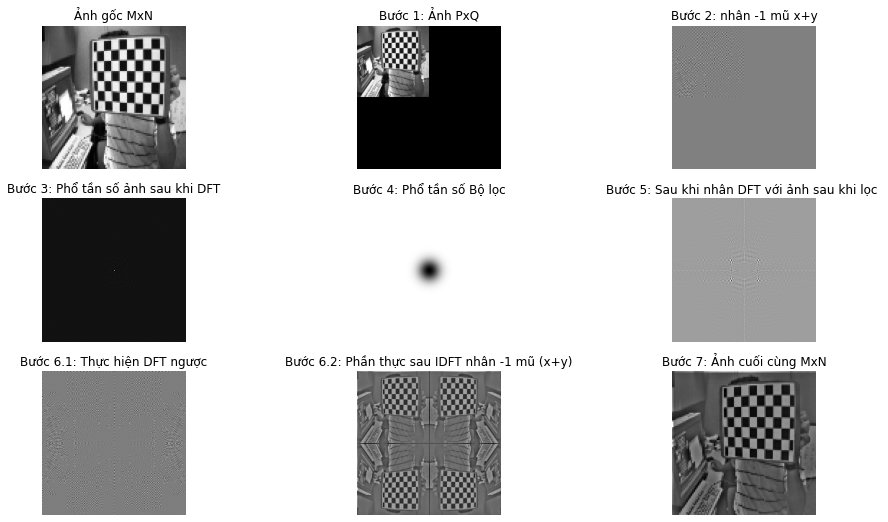

In [ ]:
show_GaussianHP()

**Gaussian thông thấp**

In [ ]:
# Định nghĩa hàm lọc thông thấp GaussianLP
def GaussianLP(D0,U,V):
    # H cho filter
    H = np.zeros((U, V))
    D = np.zeros((U, V))
    U0 = int(U / 2)
    V0 = int(V / 2)
    # Tính khoảng cách
    for u in range(U):
        for v in range(V):
            u2 = np.power(u, 2)
            v2 = np.power(v, 2)
            D[u, v] = np.sqrt(u2 + v2)
    # Tính bộ lọc
    for u in range(U):
        for v in range(V):
            H[u, v] = np.exp((-D[np.abs(u - U0), np.abs(v - V0)]**2)/(2*(D0**2)))

    return H


def show_GaussianLP():
    # Đọc ảnh
    image = cv2.imread("test.tif", 0)
    image = cv2.resize(src=image, dsize=(100, 100))
    # Chuyển các pixel của ảnh vào mảng 2 chiều f
    f = np.asarray(image)
    M, N = np.shape(f)  # Chiều x và y của ảnh

    # Bước 1: Chuyển ảnh từ kích thước MxN vào ảnh PxQ với P= 2M và Q =2N
    P, Q = 2*M , 2*N
    shape = np.shape(f)
    # Chuyển ảnh PxQ vào mảng fp
    f_xy_p = np.zeros((P, Q))
    f_xy_p[:shape[0], :shape[1]] = f

    # Bước 2: Nhân ảnh fp(x,y) với (-1) mũ (x+y) để tạo ảnh mới
    # Kết quả nhân lưu vào ma trận ảnh fpc
    F_xy_p = np.zeros((P, Q))
    for x in range(P):
        for y in range(Q):
            F_xy_p[x, y] = f_xy_p[x, y] * np.power(-1, x + y)

    # Bước 3: Chuyển đổi ảnh Fpc sang miền tần số (DFT)
    dft_cot = dft_hang = np.zeros((P, Q))
    # DFT theo P - theo cột
    for i in range(P):
        dft_cot[i] = DFT1D(F_xy_p[i])
    # DFT theo Q - theo hàng
    for j in range(Q):
        dft_hang[:, j] = DFT1D(dft_cot[:, j])

    # Bước 4: Gọi hàm GaussianLP tạo bộ lọc thông thấp Gaussian
    H_uv = GaussianLP(30,P,Q)

    # Bước 5: Nhân ảnh sau khi DFT với ảnh sau khi lọc
    G_uv = np.multiply(dft_hang, H_uv)

    # Bước 6:
    # Bước 6.1 Thực hiện biến đổi ngược DFT
    idft_cot = idft_hang = np.zeros((P, Q))
    # chuyển đổi DFT ngược theo P - theo cột
    for i in range(P):
        idft_cot[i] = IDFT1D(G_uv[i])
    # Chuyển đổi DFT ngược theo Q - theo hàng
    for j in range(Q):
        idft_hang[:, j] = IDFT1D(idft_cot[:, j])

    # Bước 6.2: Nhân phần thực ảnh sau khi biến đổi ngược với -1 mũ (x+y)
    g_array = np.asarray(idft_hang.real)
    P, Q = np.shape(g_array)
    g_xy_p = np.zeros((P, Q))
    for x in range(P):
        for y in range(Q):
            g_xy_p[x, y] = g_array[x, y] * np.power(-1, x + y)

    # Bước 7: Rút trích ảnh kích thước MxN từ ảnh PxQ
    # Và đây ảnh cuối cùng sau khi lọc
    g_xy = g_xy_p[:shape[0], :shape[1]]

    # Hiển thị ảnh
    fig = plt.figure(figsize=(16, 9))  # Tạo vùng vẽ tỷ lệ 16:9
    # Tạo 9 vùng vẽ con
    (ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9) = fig.subplots(3, 3)

    # Đọc và hiển thị ảnh gốc
    ax1.imshow(image, cmap='gray')
    ax1.set_title('Ảnh gốc MxN')
    ax1.axis('off')
    # Hiển thị ảnh mở rộng có kích thước PxQ
    ax2.imshow(f_xy_p, cmap='gray')
    ax2.set_title('Bước 1: Ảnh PxQ')
    ax2.axis('off')
    # Hiển thị ảnh sau khi nhân -1 mũ (x+y)
    ax3.imshow(F_xy_p, cmap='gray')
    ax3.set_title('Bước 2: nhân -1 mũ x+y')
    ax3.axis('off')
    # Hiển thị phổ tần số cảu anh sau khi biến đổi Fourier
    ax4.imshow(dft_hang, cmap='gray')
    ax4.set_title('Bước 3: Phổ tần số ảnh sau khi DFT')
    ax4.axis('off')
    # Hiển thị phổ tần số của bộ lọc
    ax5.imshow(H_uv, cmap='gray')
    ax5.set_title('Bước 4: Phổ tần số Bộ lọc')
    ax5.axis('off')
    # Hiển thị phổ tần số của kết quả sau khi nhân Phổ tần số sau khi DFT
    # với bộ lọc
    ax6.imshow(G_uv, cmap='gray')
    ax6.set_title('Bước 5: Sau khi nhân DFT với ảnh sau khi lọc ')
    ax6.axis('off')
    # Hiển thị ảnh sau khi biến đổi ngược
    ax7.imshow(idft_hang, cmap='gray')
    ax7.set_title('Bước 6.1: Thực hiện DFT ngược')
    ax7.axis('off')
    # Hiển thị phần thực của ảnh sau khi nhân -1 mũ (x+y)
    ax8.imshow(g_xy_p, cmap='gray')
    ax8.set_title('Bước 6.2: Phần thực sau IDFT nhân -1 mũ (x+y)')
    ax8.axis('off')
    # Hiển thị ảnh cuối cùng sau các bước, là ảnh cải thiện kích thước MxN
    ax9.imshow(g_xy, cmap='gray')
    ax9.set_title('Bước 7: Ảnh cuối cùng MxN')
    ax9.axis('off')

    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: ComplexWarning: Casting complex values to real discards the imaginary part


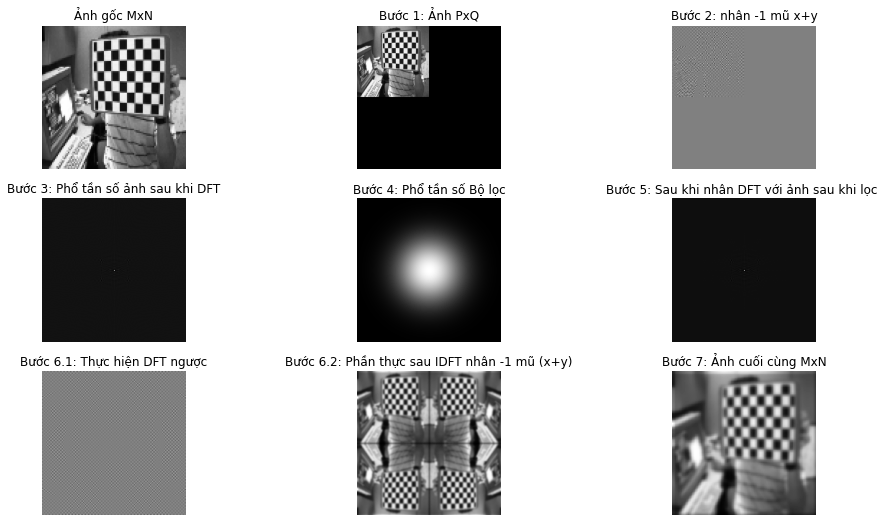

In [ ]:
show_GaussianLP()